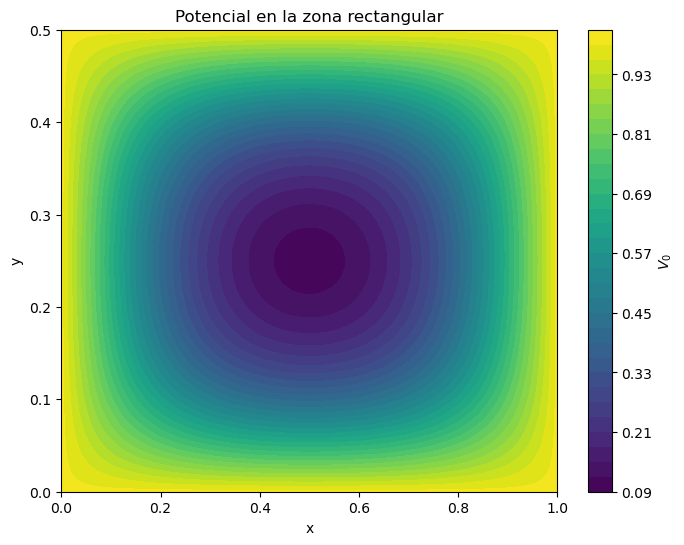

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_inicial(x_lim, y_lim, h):
    """
    Esta función da como resultado la creacion de una matriz de ceros que representa un espacio bidimensional discretizado.
    
    
    El tamaño de la matriz lo dan los parametros x_lim y y_lim, y h es el tamaño del paso entre los puntos de la matriz, es decir dx=dy.  

    Parámetros:
    x_lim: Valor máximo en el eje x.
    y_lim: Valor máximo en el eje y.
    h: Tamaño del paso.

    Retorna:
    La matriz inicializada con ceros.
    """
    # Calculamos el número de columnas (N) y filas (M) de la matriz
    N = int(x_lim / h)
    M = int(y_lim / h)
    
    # Creamos la matriz inicializada con ceros
    matriz = np.zeros((M, N))
    
    return matriz

def valores_iniciales(x_izq, x_der, y_inf, y_sup, matriz):
    """
    Esta funcion tiene el objetivo de define los valores iniciales del potencial en los bordes de la matriz.

    Parámetros:
    x_izq: Valor en el borde izquierdo.
    x_der: Valor en el borde derecho.
    y_inf: Valor en el borde inferior.
    y_sup: Valor en el borde superior.
    matriz: Matriz a la cual se le definirán los valores iniciales en los bordes.

    Retorna:
    La matriz con los valores iniciales definidos en los bordes.
    """
    tamaño = len(matriz)
    for i in range(tamaño):
        for j in range(tamaño):
            if i == 0:
                matriz[i][j] = y_inf
            elif i == tamaño - 1:
                matriz[i][j] = y_sup
            elif j == 0:
                matriz[i][j] = x_izq
            elif j == tamaño - 1:
                matriz[i][j] = x_der
            else:
                matriz[i][j] = 0  # Opcional: Puedes cambiar este valor por cualquier otro valor inicial deseado
    return matriz

def Potencial(matriz, n_iter):
    """
    Esta función halla el potencial eléctrico en una matriz por medio del método de diferencias finitas.
    Dada una matriz inicial con valores iniciales del potencial eléctrico, la función itera sobre la matriz 
    un numero específico de veces para calcular el potencial eléctrico en cada punto de la matriz.
    
    Parámetros:
    matriz: Matriz con los valores iniciales del potencial eléctrico. Esta ha sido planteada y retornada anteriormente.
    n : Número de iteraciones del método de diferencias finitas.

    Retorna:
    La matriz con el potencial eléctrico calculado.
    """
    length = len(matriz)
    nueva_matriz = np.copy(matriz)  # Creamos una copia inicial de la matriz para almacenar los nuevos valores
    for _ in range(n_iter):
        for i in range(1, length - 1):
            for j in range(1, length - 1):
                nueva_matriz[j][i] = 0.25 * (matriz[j + 1][i] + matriz[j - 1][i] + matriz[j][i + 1] + matriz[j][i - 1])
        matriz[:] = nueva_matriz  # Actualizamos la matriz original con los nuevos valores
    return matriz

def aplicar_paso_discreto(matriz):
    """
    Con esta función se aplica un paso discreto del método de diferencias finitas para calcular el potencial eléctrico 
    en la matriz previamente establecida. Para conseguir esto itera sobre cada punto interior de la matriz y calcula el nuevo valor del potencial 
    eléctrico en función de los valores actuales de los 4 puntos vecinos.

    Parámetros:
    La matriz con los valores actuales del potencial eléctrico.

    Retorna:
    La lista que representa la matriz con el potencial eléctrico calculado después de aplicar un paso discreto.
    """
    nueva_matriz = []
    for i in range(1, len(matriz) - 1):
        fila = []
        for j in range(1, len(matriz[i]) - 1):
            valor_nuevo = calcular_valor_nuevo(matriz, i, j)
            fila.append(valor_nuevo)
        nueva_matriz.append(fila)
    return nueva_matriz

def calcular_valor_nuevo(Potencial):
    """
    Calcula el nuevo valor del potencial eléctrico en un punto de la matriz.

    Parámetros:
    Potential: Matriz con los valores actuales del potencial eléctrico.
    
    Retorna:
    El nuevo valor del potencial eléctrico en el punto (i, j).
    """
    valor_nuevo = 0.25*(potential[i-1][j] + potential[i+1][j] + potential[i][j-1] + potential[i][j+1])
    return valor_nuevo

#Se define el valor del potencial en todas las caras
x_izq = 1
x_der = 1
y_inf = 1
y_sup = 1

#Matriz que representar el espacio bidimensional.
ma_bi = matriz_inicial(1, 1, 0.01)
ma_bi = valores_iniciales(x_izq, x_der, y_inf, y_sup, ma_bi)

# Se calcula el potencial utilizando el método de diferencias finitas.
ma_bi = Potencial(ma_bi, 1000)

# Definimos los puntos para graficar el potencial
x = np.linspace(0, 1, len(ma_bi[0]))
y = np.linspace(0, 0.5, len(ma_bi))

# Creamos la malla de puntos
XY = np.meshgrid(x, y)

# Creamos la figura y los ejes para la visualización
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Creamos el gráfico de contorno para visualizar el potencial
clr_plot = ax.contourf(XY[0], XY[1], ma_bi, 30)

# Se grafica
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(clr_plot, label='$V_0$')
ax.set_title('Potencial en la zona rectangular')
plt.show()

In [9]:
"""Ahora, ejecutare el test propuesto en el enunciado del taller """

'Ahora, ejecutare el test propuesto en el enunciado del taller '

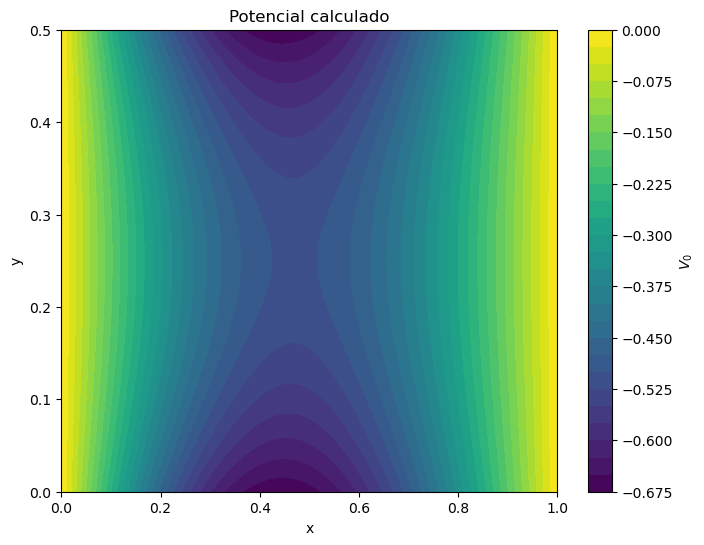

In [10]:
def potencial_test(x, y, a, b, v_0, series=1000):
    """

    Esta función calcula el potencial eléctrico en un punto (x,y) utilizando una expresion para el potencial calculada previamente a partir de la 
    ecuacion de Laplace con unas condiciones de frontera establecidas.

    Parámetros:
    x: Coordenada x del punto donde se calculará el potencial.
    y: Coordenada y del punto donde se calculará el potencial.
    a y b: Parametros asociados a las condiciones de frontera del ejercicio en cuestion. 
    v_0: Valor del potencial en el origen.
    serie: Número de términos en la serie de potencial. Por conveciencia es 1000.

    Retorna:
    Valor del potencial eléctrico en el punto (x,y).
    """

    suma = 0
    for l in range(1, series+1):
       serie =(4 / (l * np.pi)) * (((-2 * v_0) * np.exp(-l * np.pi * b / a)) /
                                     (1 - np.exp(-2 * np.pi * b / a))) * \
               (np.exp(-l * np.pi * y / a) + np.exp(-l * np.pi * (b - y) / a)) * \
               np.sin(l * np.pi * x / a)
       suma+= serie
    return suma
    
a = 1  
b = 0.5 
v_0 = 1   
series = 1000  

# Se calcula el potencial de acuerdo a la función potencial_test.
potencial_funcion = np.zeros_like(ma_bi)
for i in range(len(x)):
    for j in range(len(y)):
        potencial_funcion[j][i] = potencial_test(x[i], y[j], a, b, v_0, series)

# Visualizamos el potencial calculado
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
clr_plot = ax.contourf(XY[0], XY[1], potencial_funcion, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(clr_plot, label='$V_0$')
ax.set_title('Potencial calculado')
plt.show()

In [11]:
"""Finalmente, realizare un calculo del error """

'Finalmente, realizare un calculo del error '

In [12]:
#Se genera una matriz para almacenar las soluciones del potencial y se calcula el potencial.  
ma_bi = np.zeros((50, 100))
ma_bi = Potencial(ma_bi, 1000)

#Se inicializa y calcula el potencial eléctrico analítico en una matriz de las mismas dimensiones que ma_bi, se itera en los puntos generados por 
#np.linspace() y se almacena el resultado en la matriz que contiene la ecuación del potencial del test.
potencial_analitico = np.zeros_like(ma_bi)
x = np.linspace(0, 1, len(ma_bi[0]))
y = np.linspace(0, 0.5, len(ma_bi))
for i in range(len(x)):
    for j in range(len(y)):
        potencial_analitico[j][i] = potencial_test(x[i], y[j], a, b, v_0, series)

# Se calcula el error entre las soluciones.
error = np.abs(potencial_analitico - ma_bi)

# Finalmente, se calcula la norma del error. 
norma = np.linalg.norm(error)

print("Valor del error:", norma)


Valor del error: 28.047322902286112
